In [ ]:
!pip install fasttext

In [1]:
import pandas as pd
import fasttext
import lib

In [2]:
df = pd.read_csv('tcc_ceds_music.csv')

In [3]:
df['lyrics'].head(15)

0     hold time feel break feel untrue convince spea...
1     believe drop rain fall grow believe darkest ni...
2     sweetheart send letter goodbye secret feel bet...
3     kiss lips want stroll charm mambo chacha merin...
4     till darling till matter know till dream live ...
5     convoy light dead ahead merchantmen trump dies...
6     piece mindin world knowin life come bring give...
7     care moment hold fast press lips dream heaven ...
8     lonely night surround power read mind hour nig...
9     tear heart seat stay awhile tear heart game st...
10    better sail midnight better dive pearl better ...
11    moon shin shin wait moon pin pin place long ho...
12    come motherfucker spit shit minutes chillin bi...
13    work morning flight watch even burn away tear ...
14    see carioca foxtrot polka little rhythm blue r...
Name: lyrics, dtype: object

Parece que las oraciones ya estan normalizadas

In [4]:
words = ' '.join([i for i in df['lyrics']]).split()

In [5]:
len(set(words))

51693

El vocabulario tiene unas 51693 palabras

In [6]:
word_counts =  pd.Series(words).value_counts()

In [7]:
word_counts.head(10),word_counts.tail(10)

(know     33526
 like     29649
 time     26504
 come     23619
 go       17032
 feel     16795
 yeah     16787
 away     16773
 heart    16737
 life     15906
 dtype: int64, olny               1
 nanas              1
 atrak              1
 twyman             1
 postas             1
 annihilationall    1
 shalalalalalala    1
 shredmill          1
 lokey              1
 verification       1
 dtype: int64)

In [ ]:
word_counts.head(10).hist()

In [8]:
with open('text-data.txt', 'w', encoding='utf-8') as f:
  first = True
  for line in df['lyrics']:
    if not first: f.write('\n')
    f.write(line)
    first = False

In [9]:
!head text-data.txt -n 5

hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel
believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe
sweetheart send letter goodbye secret feel better wake dream think real false emotions feel heartaches hang long blue get bluer song remember cloudy hair
kiss l

In [15]:
model = fasttext.train_unsupervised(
    'text-data.txt', epoch=5, ws=20
)

In [16]:
from IPython.display import display_markdown
from random import choice

for i in range(10):
  word = choice(model.words)
  display_markdown(f'most similar to **{word}**', raw=True)
  for sim, word2 in model.get_nearest_neighbors(word):
    display_markdown(f'* {word2} ({sim:.02f})', raw=True)
  display_markdown(f'___')

most similar to **mondo**

* quando (0.65)

* mano (0.61)

* esperando (0.59)

* apuesto (0.59)

* mañana (0.59)

* momento (0.56)

* olvidar (0.56)

* senza (0.55)

* cuando (0.54)

* forever (0.54)

most similar to **complainin**

* explainin (0.83)

* complain (0.77)

* gainin (0.77)

* complaints (0.72)

* brainin (0.69)

* complaint (0.66)

* againin (0.63)

* aint (0.61)

* slavin (0.61)

* rainin (0.61)

most similar to **language**

* speeches (0.58)

* speech (0.58)

* speak (0.53)

* lang (0.53)

* variation (0.49)

* combination (0.47)

* samaritan (0.47)

* ethiopian (0.47)

* dialect (0.46)

* cumbersome (0.46)

most similar to **trumpet**

* trombone (0.73)

* flugelhorn (0.71)

* saxophone (0.66)

* clarinet (0.65)

* saxophones (0.65)

* byrd (0.64)

* organ (0.62)

* instrument (0.62)

* zappa (0.62)

* hark (0.60)

most similar to **boot**

* hoodlum (0.60)

* shoe (0.60)

* smifnwessun (0.58)

* trucker (0.58)

* hoot (0.58)

* hoodlums (0.58)

* prob (0.58)

* layer (0.57)

* bunch (0.57)

* gunnin (0.56)

most similar to **exceed**

* exceedingly (0.69)

* obscure (0.65)

* discourage (0.64)

* existence (0.62)

* assimilate (0.61)

* countless (0.61)

* indifference (0.59)

* crystalline (0.59)

* eons (0.59)

* nourish (0.59)

most similar to **gold**

* goldmine (0.63)

* golden (0.63)

* treasure (0.60)

* chinchilla (0.60)

* bland (0.59)

* diamonds (0.58)

* rhinestone (0.58)

* land (0.58)

* riches (0.57)

* cadillacs (0.56)

most similar to **rocket**

* socket (0.69)

* launcher (0.63)

* crockett (0.59)

* pocket (0.55)

* cricket (0.54)

* locket (0.54)

* designate (0.53)

* pointers (0.53)

* pole (0.52)

* rockrock (0.52)

most similar to **palaving**

* starve (0.67)

* people (0.63)

* matthews (0.61)

* malevolent (0.60)

* bowy (0.60)

* idren (0.60)

* plaaaace (0.59)

* live (0.59)

* brainwash (0.59)

* prosperity (0.59)

most similar to **anodyne**

* past (0.55)

* reconciliation (0.51)

* heyeeyayi (0.51)

* foolish (0.51)

* foolishly (0.50)

* leave (0.49)

* toss (0.48)

* anotha (0.47)

* board (0.47)

* trek (0.47)

Se ven muy sintácticas las similitudes, y tiene algo de sentido porque el dataset tiene palabras medio random contextualmente

In [17]:
  word = 'nigga'
  display_markdown(f'most similar to **{word}**', raw=True)
  for sim, word2 in model.get_nearest_neighbors(word):
    display_markdown(f'* {word2} ({sim:.02f})', raw=True)
  display_markdown(f'___')

most similar to **nigga**

* niggas (0.91)

* bitch (0.85)

* niggah (0.84)

* shit (0.84)

* fuck (0.80)

* mutherfuckin (0.79)

* shittin (0.78)

* bussin (0.77)

* motherfuckin (0.77)

* choppas (0.77)

In [18]:
model.save_model("lyrics_fasttext.bin")

In [19]:
from random import choices


In [20]:
choices(model.words,k=15)

['sixtyfive',
 'profile',
 'help',
 'transplant',
 'amass',
 'seasick',
 'morning',
 'mocha',
 'yoddleayee',
 'liyah',
 'macho',
 'gain',
 'contusions',
 'nestle',
 'shots']

In [22]:
%matplotlib inline

['crazy',
 'easy',
 'soon',
 'ride',
 'nothin',
 'round',
 'comin',
 'heaven',
 'house',
 'rest',
 'thank',
 'waste',
 'moment',
 'past',
 'breathe',
 'pray',
 'dear',
 'straight',
 'voice',
 'goin',
 'kind',
 'room',
 'couldn',
 'reach',
 'star',
 'lyric',
 'blind',
 'land',
 'build',
 'stick',
 'feet',
 'hang',
 'tire',
 'fine',
 'kick',
 'check',
 'whoa',
 'summer',
 'drive',
 'shake',
 'scream',
 'laugh',
 'hearts',
 'send',
 'piece',
 'lookin',
 'share',
 'tight',
 'water',
 'lead',
 'steal',
 'scar',
 'talkin',
 'commercial',
 'street',
 'afraid',
 'belong',
 'blame',
 'plan',
 'gettin',
 'bone',
 'cross',
 'city',
 'livin',
 'bear',
 'meet',
 'control',
 'lover',
 'stone',
 'feelin',
 'moon',
 'wear',
 'lips',
 'memory',
 'nights',
 'memories',
 'sick',
 'ways',
 'rise',
 'trust',
 'happen',
 'floor',
 'count',
 'mouth',
 'slip',
 'mama',
 'fast',
 'pick',
 'yesterday',
 'shame',
 'near',
 'girls',
 'flow',
 'breath',
 'search',
 'move',
 'power',
 'peace',
 'songs',
 'shine',
 

C:\Users\Felip\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Felip\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


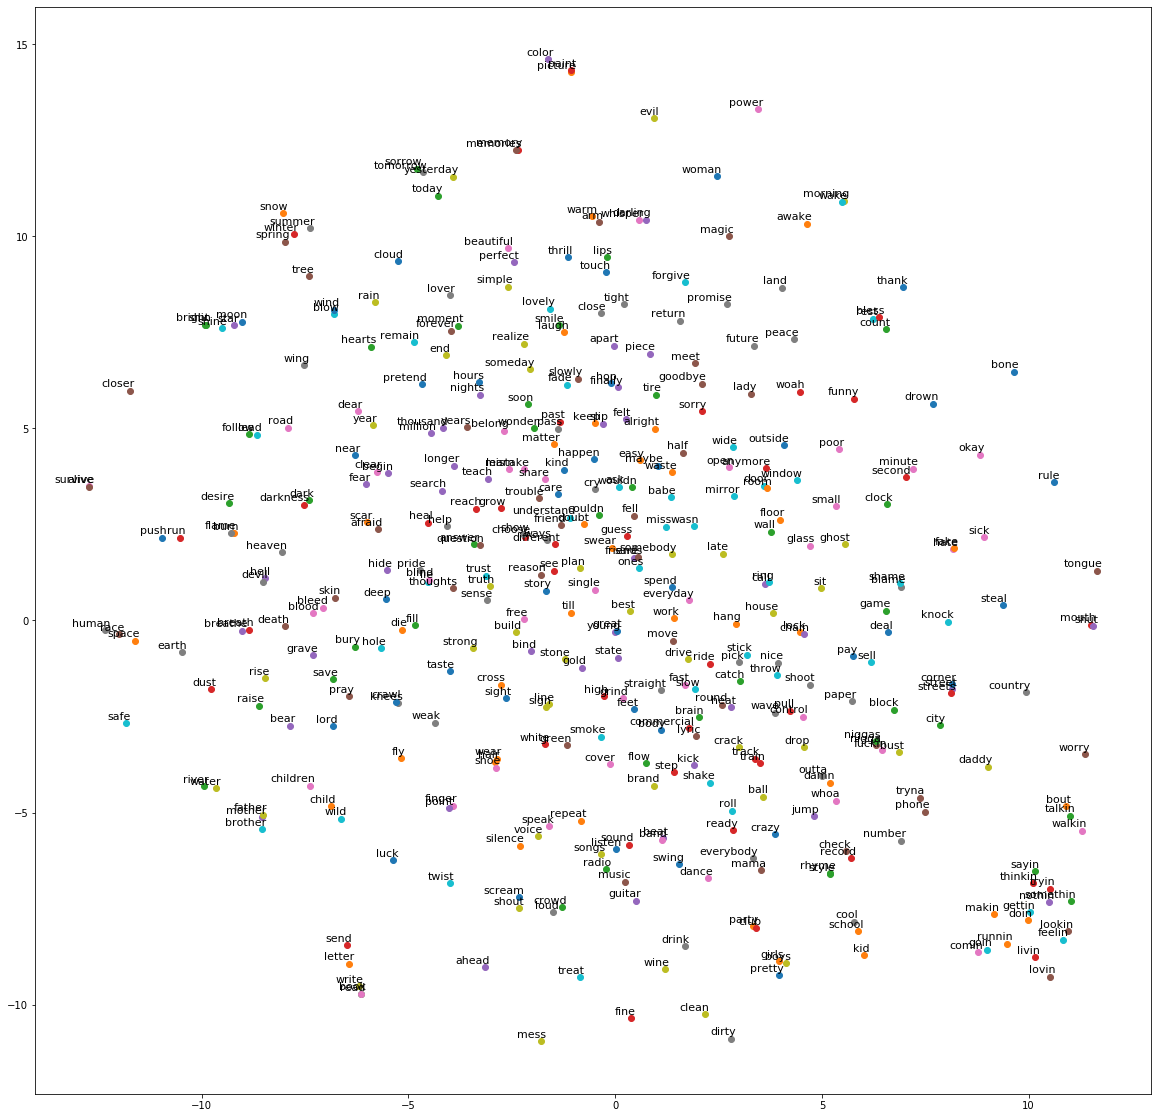

In [37]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# obtener las palabras más comunes en el corpus, entre la 200 y la 600
words = word_counts.head(1000).index.to_list()[100:500]
# convertirlas a vector
embeddings = [model[word] for word in words]

#  T-SNE
words_embedded = TSNE(n_components=2, random_state=1).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()